# Sketch Processing and Vectorization Tests
Trying out different modules that might simplify the sketch and convert it using pypotrace.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2

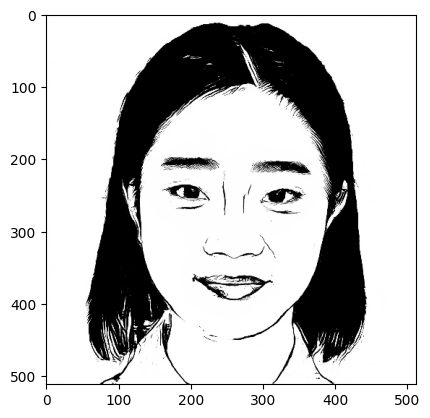

In [182]:
# Example Data NAO IMGS
path = 'sketched_bmps'
imgs = []
for f in os.listdir(path):
    imgs.append(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2RGB))
test_img = imgs[-2]
plt.imshow(test_img)

dtype('uint8')

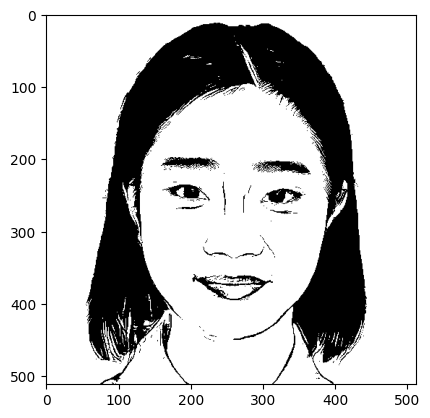

In [183]:
# prepare image
img_prep = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

ret,img_thresh = cv2.threshold(img_prep,127,255,cv2.THRESH_BINARY)
plt.imshow(img_thresh, cmap='gray')
img_thresh.dtype

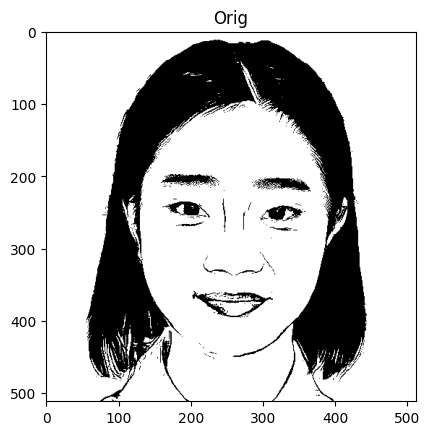

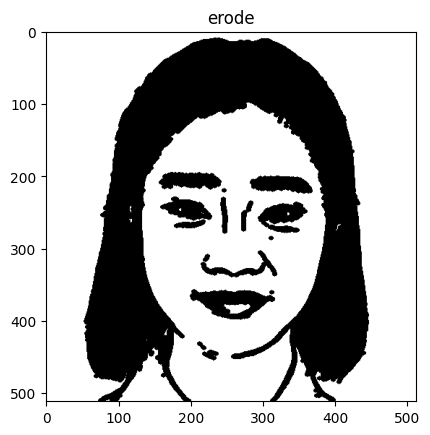

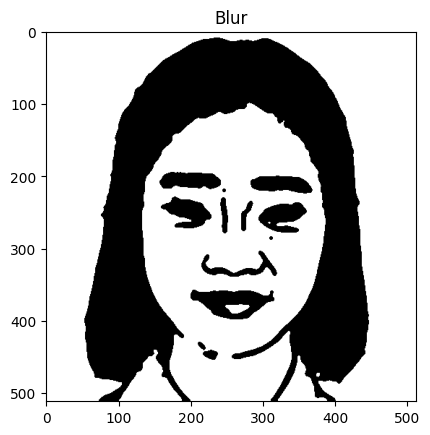

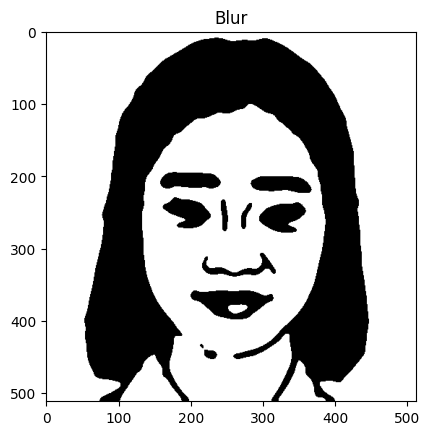

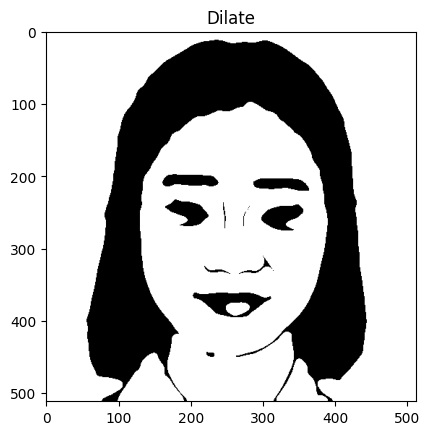

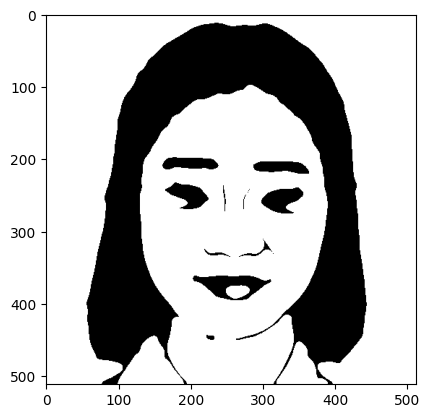

In [184]:
erosion_shape = cv2.MORPH_CROSS# cv2.MORPH_ELLIPSE #cv2.MORPH_RECT, 

def erode(img, size, shape=cv2.MORPH_CROSS):
    element = cv2.getStructuringElement(shape, (2 * size + 1, 2 * size + 1),
                                       (size, size))
    return cv2.erode(img, element)

def dilate(img, size, shape=cv2.MORPH_CROSS):
    element = cv2.getStructuringElement(shape, (2 * size + 1, 2 * size + 1),
                                       (size, size))
    return cv2.dilate(img, element)


def blur(img, size):
    return cv2.GaussianBlur(img, (size,size), size/2)


def show(img, title=''):
    _,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(title)
    return img

tester = img_thresh.copy()    
show(tester, 'Orig')


tester = erode(tester, 3, cv2.MORPH_ELLIPSE)
show(tester, 'erode')

tester = blur(tester, 7)
show(tester, 'Blur')

tester = blur(tester, 11)
show(tester, 'Blur')

tester = dilate(tester, 3, cv2.MORPH_ELLIPSE)
show(tester, 'Dilate')

tester = show(tester)

In [185]:
from potrace import Bitmap
bm = Bitmap(tester.astype(bool))
# trace([turdsize, turnpolicy, alphamax, opticurve, opttolerance, progress_func])
path = bm.trace(turdsize = 50, opticurve=0, opttolerance=0.1)

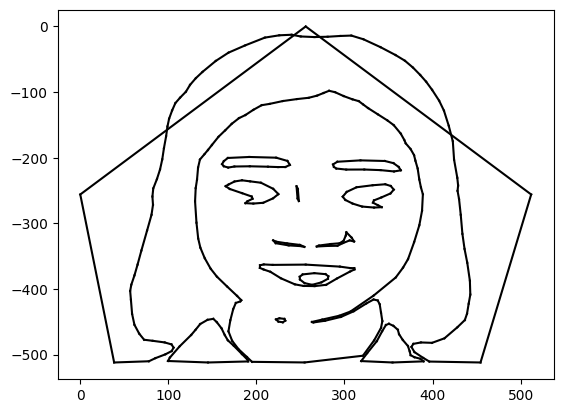

In [186]:
# Iterate over path curves
for curve in path:
    #print("start_point =", curve.start_point)
    sx, sy = curve.start_point
    #plt.scatter(-curve.start_point[0], -curve.start_point[1], s=1, c='black')
    for segment in curve:
        #print(segment)
        ex, ey = segment.end_point
        #plt.scatter(ex, -ey, s=1, c='black')
        plt.plot([sx, ex], [-sy,-ey], color='black')
        sx = ex
        sy = ey
        if segment.is_corner:
            c_x, c_y = segment.c
            #plt.scatter(-c_x, -c_y,s=1, c='black')
        else:
            c1_x, c1_y = segment.c1
            c2_x, c2_y = segment.c2
            #plt.scatter(c1_x, -c1_y, s=1, c='orange')
            #plt.scatter(c2_x, -c2_y, s=1, c='orange')